In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df=pd.read_csv("Spotify -Raw Data.csv",encoding='ISO-8859-1')
df["streams"] = pd.to_numeric(df["streams"], errors="coerce")
df["in_spotify_playlists"] = pd.to_numeric(df["in_spotify_playlists"], errors="coerce")
df = df.dropna()

threshold = df["streams"].quantile(0.80)  # Top 10% most streamed songs
df["popular"] = (df["streams"] >= threshold).astype(int) 

features = ["bpm", "danceability_%", "valence_%", "energy_%", "acousticness_%", "instrumentalness_%","in_spotify_playlists"]
X = df[features]
y = df["popular"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Full dataset distribution:\n", df["popular"].value_counts())
print("Train set distribution:\n", y_train.value_counts())
print("Test set distribution:\n", y_test.value_counts())
print(df["popular"].value_counts())

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred,zero_division=1))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Full dataset distribution:
 popular
0    652
1    164
Name: count, dtype: int64
Train set distribution:
 popular
0    521
1    131
Name: count, dtype: int64
Test set distribution:
 popular
0    131
1     33
Name: count, dtype: int64
popular
0    652
1    164
Name: count, dtype: int64
Accuracy: 0.92

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       131
           1       0.92      0.67      0.77        33

    accuracy                           0.92       164
   macro avg       0.92      0.83      0.86       164
weighted avg       0.92      0.92      0.92       164


Confusion Matrix:
 [[129   2]
 [ 11  22]]


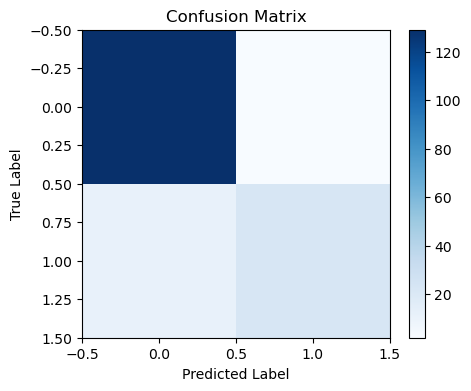

In [6]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
plt.imshow(conf_matrix, cmap="Blues", interpolation="nearest")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,popular
count,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,8.160000e+02,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000
mean,1.568627,2018.517157,6.024510,13.712010,4852.316176,11.736520,4.689858e+08,60.215686,49.534314,2.454657,122.580882,67.409314,51.172794,64.356618,26.333333,1.678922,18.170343,10.535539,0.200980
std,0.876522,10.701973,3.570415,9.294719,7745.565488,18.624555,5.231267e+08,74.953565,49.570536,5.399650,28.188643,14.688808,23.620742,16.116646,25.477606,8.772508,13.550239,10.222852,0.400979
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000,0.000000
25%,1.000000,2021.000000,3.000000,5.000000,829.000000,0.000000,1.342848e+08,12.000000,6.000000,0.000000,99.000000,57.000000,32.000000,53.000000,5.000000,0.000000,10.000000,4.000000,0.000000
50%,1.000000,2022.000000,5.000000,13.000000,2037.500000,3.000000,2.638368e+08,32.000000,34.500000,0.000000,120.000000,70.000000,51.000000,66.000000,17.000000,0.000000,12.000000,6.000000,0.000000
75%,2.000000,2022.000000,9.000000,22.000000,4890.750000,16.000000,6.011986e+08,78.250000,84.000000,2.000000,141.250000,79.000000,70.000000,76.000000,41.000000,0.000000,24.000000,12.000000,0.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.562544e+09,532.000000,275.000000,45.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000,1.000000
